In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("Downloads\Problem Statement 2_ Data set.csv")

In [4]:
df.head()

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03T08:09:29Z,Excavator_1,Engine,Temparature,104.0
1,5,2022-05-12T02:05:42Z,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,24,2022-05-27T06:25:04Z,Articulated_Truck_1,Engine,Temparature,104.0
3,23,2022-05-12T20:36:47Z,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,42,2022-06-28T04:06:30Z,Excavator_1,Engine,Oil Pressure,39.0


In [6]:
import matplotlib.pyplot as plt

<BarContainer object of 1000 artists>

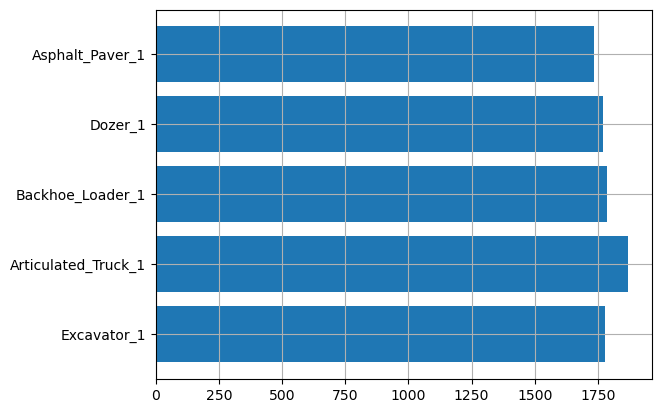

In [21]:
plt.grid()
plt.barh(df['Machine'],df['Value'])

In [8]:
import seaborn as sns

<Axes: >

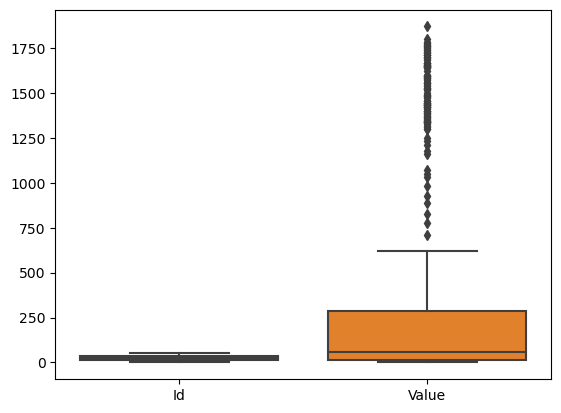

In [9]:
sns.boxplot(data = df)

In [22]:
df1 = pd.read_csv("Downloads\Threshold.csv")

In [23]:
df1.head()

,Parameter,Treshold,Probability of Failure
0,Engine Oil Pressure,"Low 25, High 65",High
1,Engine Speed,High 1800,Medium
2,Engine Temparature,High 105,High
3,Brake Control,Low 1,Medium
4,Transmission Pressure,Low 200 and High 450,Medium


In [81]:
import sys
max_val = sys.maxsize
min_val = -sys.maxsize - 1
Threshold_Dict = {}
for i,val in enumerate(df1['Treshold']):
    val = val.replace(",","")
    val = val.replace("and ","")
    val = val.split(" ")
    print(i,val)
    parameter = df1['Parameter'][i]
    lh = []
    if 'Low' in val:
        ind_l = val.index('Low')
        lh.append(float(val[ind_l+1]))
    else:
        lh.append(min_val)
    if 'High' in val:
        ind_h = val.index('High')
        lh.append(float(val[ind_h+1]))
    else:
        lh.append(max_val)
    
    lh.append(df1['Probability of Failure'][i])
    Threshold_Dict[parameter] = lh
    
print(Threshold_Dict)
#     print(val)


0 ['Low', '25', 'High', '65']
1 ['High', '1800']
2 ['High', '105']
3 ['Low', '1']
4 ['Low', '200', 'High', '450']
5 ['High', '4.7']
6 ['High', '1800']
7 ['Low', '1']
8 ['Low', '35', 'High', '65']
9 ['High', '400']
10 ['Low', '12.0', 'High', '15.0']
11 ['High', '365']
12 ['High', '125']
13 ['Low', '20']
{'Engine Oil Pressure': [25.0, 65.0, 'High'], 'Engine Speed': [-9223372036854775808, 1800.0, 'Medium'], 'Engine Temparature': [-9223372036854775808, 105.0, 'High'], 'Brake Control': [1.0, 9223372036854775807, 'Medium'], 'Transmission Pressure': [200.0, 450.0, 'Medium'], 'Pedal Sensor': [-9223372036854775808, 4.7, 'Low'], 'Water Fuel': [-9223372036854775808, 1800.0, 'High'], 'Fuel Level': [1.0, 9223372036854775807, 'Low'], 'Fuel Pressure': [35.0, 65.0, 'Low'], 'Fuel Temparature': [-9223372036854775808, 400.0, 'High'], 'System Voltage': [12.0, 15.0, 'High'], 'Exhaust Gas Temparature': [-9223372036854775808, 365.0, 'High'], 'Hydraulic Pump Rate': [-9223372036854775808, 125.0, 'Medium'], 'Ai

In [59]:
s1 = ['water','fuel']
s2 = ['water','in','fuel']
check = all(e in s2 for e in s1)
print(check)

True


In [62]:
x = df['Parameter'][1].split()
x

['Water', 'in', 'Fuel']

In [72]:
x = (df['Component'][0] + " " + df['Parameter'][0]).split(" ")
x

['Engine', 'Temparature']

In [70]:
list(Threshold_Dict.keys())

['Engine Oil Pressure',
 'Engine Speed',
 'Engine Temparature',
 'Brake Control',
 'Transmission Pressure',
 'Pedal Sensor',
 'Water Fuel',
 'Fuel Level',
 'Fuel Pressure',
 'Fuel Temparature',
 'System Voltage',
 'Exhaust Gas Temparature',
 'Hydraulic Pump Rate',
 'Air Filter Pressure Drop']

In [78]:
for item in list(Threshold_Dict.keys()):
    temp  = item.split(" ")
    if all(e in x for e in temp):
        Low = Threshold_Dict[item][0]  
        High = Threshold_Dict[item][1]
        print(Low,High)


False
False
True
Engine Temparature
-9223372036854775808 105.0
False
False
False
False
False
False
False
False
False
False
False


In [122]:
pof = {'Low':0, 'Medium':1, 'High':2}
PoF = []
for entry in range(len(df['Parameter'])):
    if df['Component'][entry] == "Misc":
        x = df['Parameter'][entry].split(" ")
    else:
        x = (df['Component'][entry] + " " + df['Parameter'][entry]).split(" ")
    for item in list(Threshold_Dict.keys()):
        temp  = item.split(" ")
        if all(e in x for e in temp):
            Low = Threshold_Dict[item][0]  
            High = Threshold_Dict[item][1]
            Prob = Threshold_Dict[item][2]
            val = df['Value'][entry]
            if val < Low or val > High:
                PoF.append(pof[Prob])
            else:
                PoF.append(-1)
        elif all(e in temp for e in x):
            Low = Threshold_Dict[item][0]  
            High = Threshold_Dict[item][1]
            Prob = Threshold_Dict[item][2]
            val = df['Value'][entry]
            if val < Low or val > High:
                PoF.append(pof[Prob])
            else:
                PoF.append(-1)
print(count)
df["PoF"] = PoF


35


In [123]:
df

,Id,Time,Machine,Component,Parameter,Value,PoF
0,48,2022-06-03T08:09:29Z,Excavator_1,Engine,Temparature,104.0,-1
1,5,2022-05-12T02:05:42Z,Articulated_Truck_1,Fuel,Water in Fuel,70.0,-1
2,24,2022-05-27T06:25:04Z,Articulated_Truck_1,Engine,Temparature,104.0,-1
3,23,2022-05-12T20:36:47Z,Backhoe_Loader_1,Drive,Transmission Pressure,231.0,-1
4,42,2022-06-28T04:06:30Z,Excavator_1,Engine,Oil Pressure,39.0,-1
...,...,...,...,...,...,...,...
995,18,2022-06-29T16:29:54Z,Asphalt_Paver_1,Misc,Exhaust Gas Temparature,263.0,-1
996,43,2022-06-29T16:52:23Z,Asphalt_Paver_1,Fuel,Level,7.0,-1
997,28,2022-06-29T20:00:46Z,Asphalt_Paver_1,Misc,Air Filter Pressure,23.0,-1
998,4,2022-06-30T14:09:21Z,Asphalt_Paver_1,Misc,Air Filter Pressure,26.0,-1


In [130]:
df.to_csv("Downloads/Dataset1.csv")

In [136]:
df.sort_values(by = ["Machine","Id"])

,Id,Time,Machine,Component,Parameter,Value,PoF
7,1,2022-06-28T01:17:39Z,Articulated_Truck_1,Drive,Brake Control,2.0,-1
164,1,2022-05-12T09:47:44Z,Articulated_Truck_1,Engine,Speed,1700.0,-1
399,1,2022-05-23T10:00:10Z,Articulated_Truck_1,Misc,System Voltage,12.6,-1
622,1,2022-06-09T14:04:18Z,Articulated_Truck_1,Fuel,Water in Fuel,50.0,-1
10,2,2022-06-01T21:02:41Z,Articulated_Truck_1,Misc,Exhaust Gas Temparature,190.0,-1
...,...,...,...,...,...,...,...
799,49,2022-06-19T15:31:30Z,Excavator_1,Fuel,Pressure,45.0,-1
281,50,2022-05-21T16:36:24Z,Excavator_1,Drive,Transmission Pressure,363.0,-1
313,50,2022-05-09T03:25:11Z,Excavator_1,Misc,Exhaust Gas Temparature,262.0,-1
457,50,2022-05-13T00:03:58Z,Excavator_1,Fuel,Water in Fuel,1439.0,-1
